# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from matplotlib.pyplot import subplots, show
from pprint import pprint
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 643


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather["coord"]['lon']
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather["main"]['humidity']
        city_clouds = city_weather["clouds"]['all']
        city_wind = city_weather["wind"]['speed']
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | concordia
Processing Record 2 of Set 1 | karakendzha
City not found. Skipping...
Processing Record 3 of Set 1 | itacoatiara
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | alekseyevsk
Processing Record 6 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 7 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 1 | waitati
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | madingou
Processing Record 11 of Set 1 | ciparay
Processing Record 12 of Set 1 | vangaindrano
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | leningradskiy
Processing Record 15 of Set 1 | moose factory
Processing Record 16 of Set 1 | samusu
City not found. Skipping...
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | gojra
Processing Record 19 of Set 1 | mataura
Processing Record 20 o

Processing Record 34 of Set 4 | mayo
Processing Record 35 of Set 4 | strezhevoy
Processing Record 36 of Set 4 | bridlington
Processing Record 37 of Set 4 | lavrentiya
Processing Record 38 of Set 4 | juneau
Processing Record 39 of Set 4 | sao filipe
Processing Record 40 of Set 4 | alice springs
Processing Record 41 of Set 4 | kodiak
Processing Record 42 of Set 4 | jamestown
Processing Record 43 of Set 4 | vardo
Processing Record 44 of Set 4 | aanekoski
Processing Record 45 of Set 4 | tongliao
Processing Record 46 of Set 4 | jiddah
City not found. Skipping...
Processing Record 47 of Set 4 | amga
Processing Record 48 of Set 4 | goundam
Processing Record 49 of Set 4 | naqadeh
Processing Record 0 of Set 5 | bethel
Processing Record 1 of Set 5 | kirakira
Processing Record 2 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 3 of Set 5 | esmeraldas
Processing Record 4 of Set 5 | nantucket
Processing Record 5 of Set 5 | kaitangata
Processing Record 6 of Set 5 | naron
Processing

Processing Record 23 of Set 8 | porto velho
Processing Record 24 of Set 8 | amos
Processing Record 25 of Set 8 | qasigiannguit
Processing Record 26 of Set 8 | sungurlu
Processing Record 27 of Set 8 | buraydah
Processing Record 28 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 29 of Set 8 | rio grande
Processing Record 30 of Set 8 | bereznik
Processing Record 31 of Set 8 | henties bay
Processing Record 32 of Set 8 | udachnyy
Processing Record 33 of Set 8 | naze
Processing Record 34 of Set 8 | marzuq
Processing Record 35 of Set 8 | diamantino
Processing Record 36 of Set 8 | tessalit
Processing Record 37 of Set 8 | bjerringbro
Processing Record 38 of Set 8 | dalinghe
City not found. Skipping...
Processing Record 39 of Set 8 | codajas
Processing Record 40 of Set 8 | wlodawa
Processing Record 41 of Set 8 | talcahuano
Processing Record 42 of Set 8 | verkhnevilyuysk
Processing Record 43 of Set 8 | chapais
Processing Record 44 of Set 8 | sukumo
Processing Record 45 of Set 8 

Processing Record 10 of Set 12 | matongo
Processing Record 11 of Set 12 | anito
Processing Record 12 of Set 12 | le port
Processing Record 13 of Set 12 | biak
Processing Record 14 of Set 12 | kaabong
Processing Record 15 of Set 12 | saint-joseph
Processing Record 16 of Set 12 | portel
Processing Record 17 of Set 12 | sainte-adele
Processing Record 18 of Set 12 | harker heights
Processing Record 19 of Set 12 | wau
Processing Record 20 of Set 12 | avera
Processing Record 21 of Set 12 | tabialan
City not found. Skipping...
Processing Record 22 of Set 12 | fukue
Processing Record 23 of Set 12 | dingle
Processing Record 24 of Set 12 | uvinza
Processing Record 25 of Set 12 | ieper
Processing Record 26 of Set 12 | batman
Processing Record 27 of Set 12 | abong mbang
Processing Record 28 of Set 12 | kazanskoye
Processing Record 29 of Set 12 | lujan
Processing Record 30 of Set 12 | cumberland
Processing Record 31 of Set 12 | ambilobe
Processing Record 32 of Set 12 | flinders
Processing Record 33

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [6]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,concordia,-31.3930,-58.0209,22.73,41,0,3.75,AR,1670300125
1,itacoatiara,-3.1431,-58.4442,22.78,90,87,1.02,BR,1670300125
2,bredasdorp,-34.5322,20.0403,13.39,75,73,1.14,ZA,1670300126
3,alekseyevsk,57.8406,108.3492,-11.25,94,100,4.89,RU,1670300127
4,waitati,-45.7500,170.5667,11.56,70,97,3.94,NZ,1670300128


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,concordia,-31.3930,-58.0209,22.73,41,0,3.75,AR,1670300125
1,itacoatiara,-3.1431,-58.4442,22.78,90,87,1.02,BR,1670300125
2,bredasdorp,-34.5322,20.0403,13.39,75,73,1.14,ZA,1670300126
3,alekseyevsk,57.8406,108.3492,-11.25,94,100,4.89,RU,1670300127
4,waitati,-45.7500,170.5667,11.56,70,97,3.94,NZ,1670300128


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

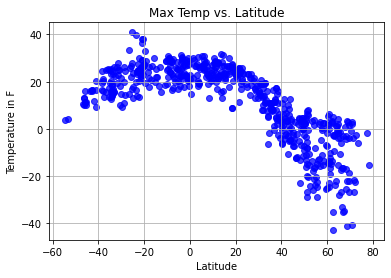

In [9]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y=city_data_df['Max Temp']
plt.scatter(x,y, marker="o", facecolors='blue',alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Temperature in F')
plt.title('Max Temp vs. Latitude')
plt.grid(axis = 'both')
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

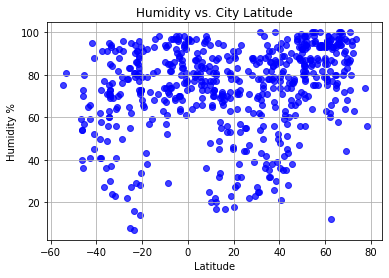

In [10]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y=city_data_df['Humidity']
plt.scatter(x,y, marker="o", facecolors='blue',alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Humidity vs. City Latitude')
plt.grid(axis = 'both')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

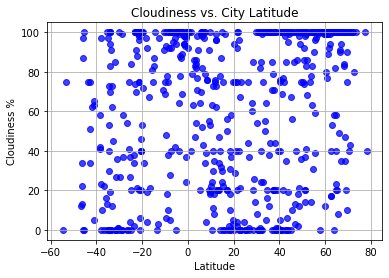

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y=city_data_df['Cloudiness']
plt.scatter(x,y, marker="o", facecolors='blue',alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Cloudiness vs. City Latitude')
plt.grid(axis = 'both')


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

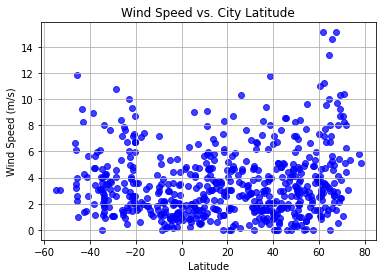

In [12]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y=city_data_df['Wind Speed']
plt.scatter(x,y, marker="o", facecolors='blue',alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed vs. City Latitude')
plt.grid(axis = 'both')
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def func_regression(x,y,df,n,coor):
    headers = list(df.columns)
    x = df[headers[1]]
    y=df[headers[n]]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    correlation = st.pearsonr(x,y)
    print(f"The correlation between {headers[n]} and Latitude is {round(correlation[0],2)}")
    plt.xlabel('Latitude')
    plt.ylabel(headers[n]) 
    plt.annotate(line_eq,coor,color='red')
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df[('Lat')]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,alekseyevsk,57.8406,108.3492,-11.25,94,100,4.89,RU,1670300127
9,kapaa,22.0752,-159.3190,24.18,91,100,4.63,US,1670299974
10,leningradskiy,69.3833,178.4167,-21.88,88,90,2.47,RU,1670300131
11,moose factory,51.2585,-80.6094,-20.01,77,100,4.63,CA,1670300012
13,gojra,31.1487,72.6866,18.84,25,0,1.69,PK,1670300132


In [15]:
list(northern_hemi_df.columns)


['City',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed',
 'Country',
 'Date']

In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df[('Lat')]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,concordia,-31.3930,-58.0209,22.73,41,0,3.75,AR,1670300125
1,itacoatiara,-3.1431,-58.4442,22.78,90,87,1.02,BR,1670300125
2,bredasdorp,-34.5322,20.0403,13.39,75,73,1.14,ZA,1670300126
4,waitati,-45.7500,170.5667,11.56,70,97,3.94,NZ,1670300128
5,east london,-33.0153,27.9116,15.79,76,73,3.52,ZA,1670300128


###  Temperature vs. Latitude Linear Regression Plot

The correlation between Max Temp and Latitude is -0.85


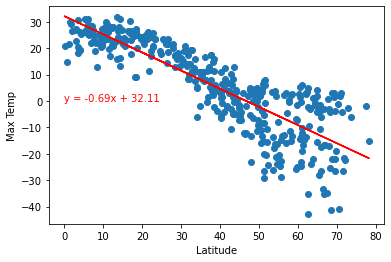

In [17]:
# Linear regression on Northern Hemisphere
func_regression(x,y,northern_hemi_df,3,(0,0))

The correlation between Max Temp and Latitude is 0.53


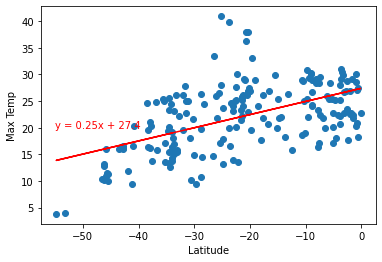

In [18]:
# Linear regression on Southern Hemisphere
func_regression(x,y,southern_hemi_df,3,(-55,20))

##### **Discussion about the linear relationship:** 

-The two plots depoict a linear relationship, although not exact, as all the points are not on the line. 
-The correlation of 0.53 for southern hemishphere further explains that relationship is not a perfect linear relationship and there are other factors impacting temperature, however, a large part of the change in temperature is still being driven by changes in latitude. 
-The correlation of -0.83 for northern hemishphere also explains that relationship is not a perfect linear relationship and there are other factors impacting temperature, however, a larger part of the change in temperature is being driven by changes in latitude in this case, as correlation is nearer to -1, which also confirms that the nature of relationship is inverse, i.e. as latitude increases, temperature decreases. 

### Humidity vs. Latitude Linear Regression Plot

The correlation between Humidity and Latitude is 0.28


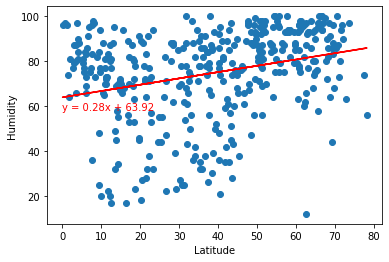

In [27]:
# Northern Hemisphere
func_regression(x,y,northern_hemi_df,4,(0,58))

The correlation between Humidity and Latitude is 0.34


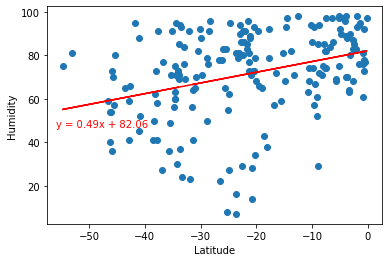

In [30]:
# Southern Hemisphere
func_regression(x,y,southern_hemi_df,4,(-56,47))

## **Discussion about the linear relationship:** 
-The two plots depict a non-linear relationship, although majority of cities sre converging towrads the linear relationship, but very few cities fall on the line itself. 
-The correlation of 0.28 and 0.34 for both northern and southern hemishphere point to the fact that the trend line does not indicate a perfect linear relationship and there are other factors impacting humidity. Concluding that only a small part of the change in humidity is being driven by changes in latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between Cloudiness and Latitude is 0.27


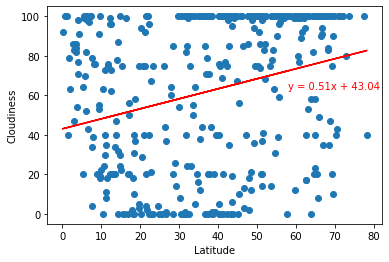

In [21]:
# Northern Hemisphere
func_regression(x,y,northern_hemi_df,5,(58,63))

The correlation between Cloudiness and Latitude is 0.41


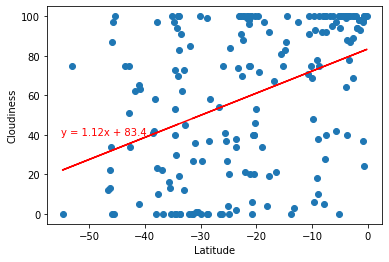

In [25]:
# Southern Hemisphere
func_regression(x,y,southern_hemi_df,5,(-55,40))

**Discussion about the linear relationship:** 
-The two plots depoict a non-linear relationship, as most of the points are not falling on the line. 
-The correlation is weak at 0.27 and 0.41 for the two hemishpheres, which further explains that relationship is weak and there are other missing factors impacting cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between Wind Speed and Latitude is 0.22


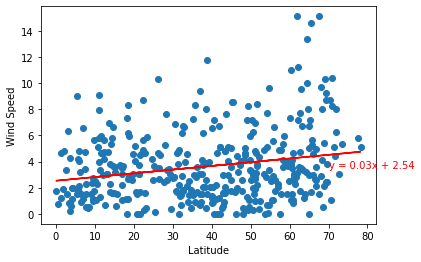

In [38]:
# Northern Hemisphere
func_regression(x,y,northern_hemi_df,6,(70,3.5))

The correlation between Wind Speed and Latitude is -0.32


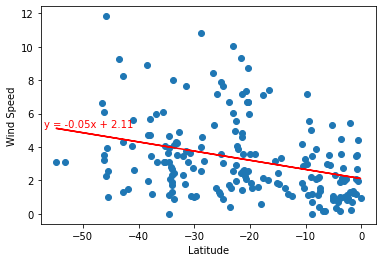

In [40]:
# Southern Hemisphere
func_regression(x,y,southern_hemi_df,6,(-57,5.2))

**Discussion about the linear relationship:** 
-The two plots depoict that for most cities wind speed is in the similar range of =<6m/s. 
-The correlation is also weak at 0.22 and -0.32 for northern and southern hemishpheres respectively. Further, it is a weak inverse r4elationship for southern hemishphere. 
-There are clearly other factors as latitude is not the major driver of wind speed for a particular city.  